In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import warnings
import xgboost as xgb
from sklearn.tree import plot_tree

warnings.filterwarnings('ignore')

In [15]:
data = pd.read_csv("dataset.csv")
data.head(40)

,Student ID,Cousin,Teacher,Parent,Degree Student,Working Person,Course Chosen
0,1,Engineering,Medicine,Commerce,Commerce,Engineering,Engineering
1,2,Engineering,Engineering,Medicine,Commerce,Commerce,Commerce
2,3,Engineering,Engineering,Engineering,Engineering,Engineering,Engineering
3,4,Commerce,Commerce,Commerce,Commerce,Commerce,Commerce
4,5,Medicine,Medicine,Medicine,Medicine,Medicine,Medicine
5,6,Engineering,Engineering,Engineering,Engineering,Commerce,Engineering
6,7,Medicine,Engineering,Commerce,Medicine,Engineering,Medicine
7,8,Engineering,Commerce,Engineering,Engineering,Engineering,Engineering
8,9,Commerce,Commerce,Commerce,Commerce,Commerce,Commerce
9,10,Commerce,Medicine,Engineering,Medicine,Engineering,Medicine


In [18]:
# Prepare the features and target variable
X = data.drop(columns=["Student ID", "Course Chosen"])
y = data["Course Chosen"]

In [19]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([1, 0, 1, 0, 2, 1, 2, 1, 0, 2, 2, 0, 1, 2, 1])

In [17]:
# One-hot encode the features
X_encoded = pd.get_dummies(X)
X_encoded

,Cousin_Commerce,Cousin_Engineering,Cousin_Medicine,Teacher_Commerce,Teacher_Engineering,Teacher_Medicine,Parent_Commerce,Parent_Engineering,Parent_Medicine,Degree Student_Commerce,Degree Student_Engineering,Degree Student_Medicine,Working Person_Commerce,Working Person_Engineering,Working Person_Medicine
0,False,True,False,False,False,True,True,False,False,True,False,False,False,True,False
1,False,True,False,False,True,False,False,False,True,True,False,False,True,False,False
2,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False
3,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
4,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True
5,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False
6,False,False,True,False,True,False,True,False,False,False,False,True,False,True,False
7,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False
8,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
9,True,False,False,False,False,True,False,True,False,False,False,True,False,True,False


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

Random Forest

In [6]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.6666666666666666


AdaBoost

In [7]:
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train, y_train)
ada_pred = ada_clf.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)
print("AdaBoost Accuracy:", ada_accuracy)

AdaBoost Accuracy: 0.3333333333333333


XGBoost

In [8]:
xgb_clf = XGBClassifier(n_estimators=100, random_state=42)
xgb_clf.fit(X_train, y_train, eval_metric='mlogloss', eval_set=[(X_test, y_test)], verbose=25)
xgb_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy:", xgb_accuracy)

[0]	validation_0-mlogloss:1.05268
[25]	validation_0-mlogloss:1.27603
[50]	validation_0-mlogloss:1.27790
[75]	validation_0-mlogloss:1.27791
[99]	validation_0-mlogloss:1.27791
XGBoost Accuracy: 0.3333333333333333


Plots

In [21]:
# Plotting
class_names_list = list(label_encoder.classes_)
class_names_list

['Commerce', 'Engineering', 'Medicine']

In [23]:
feature_names_list = X_train.columns.tolist()
feature_names_list

['Cousin_Commerce',
 'Cousin_Engineering',
 'Cousin_Medicine',
 'Teacher_Commerce',
 'Teacher_Engineering',
 'Teacher_Medicine',
 'Parent_Commerce',
 'Parent_Engineering',
 'Parent_Medicine',
 'Degree Student_Commerce',
 'Degree Student_Engineering',
 'Degree Student_Medicine',
 'Working Person_Commerce',
 'Working Person_Engineering',
 'Working Person_Medicine']

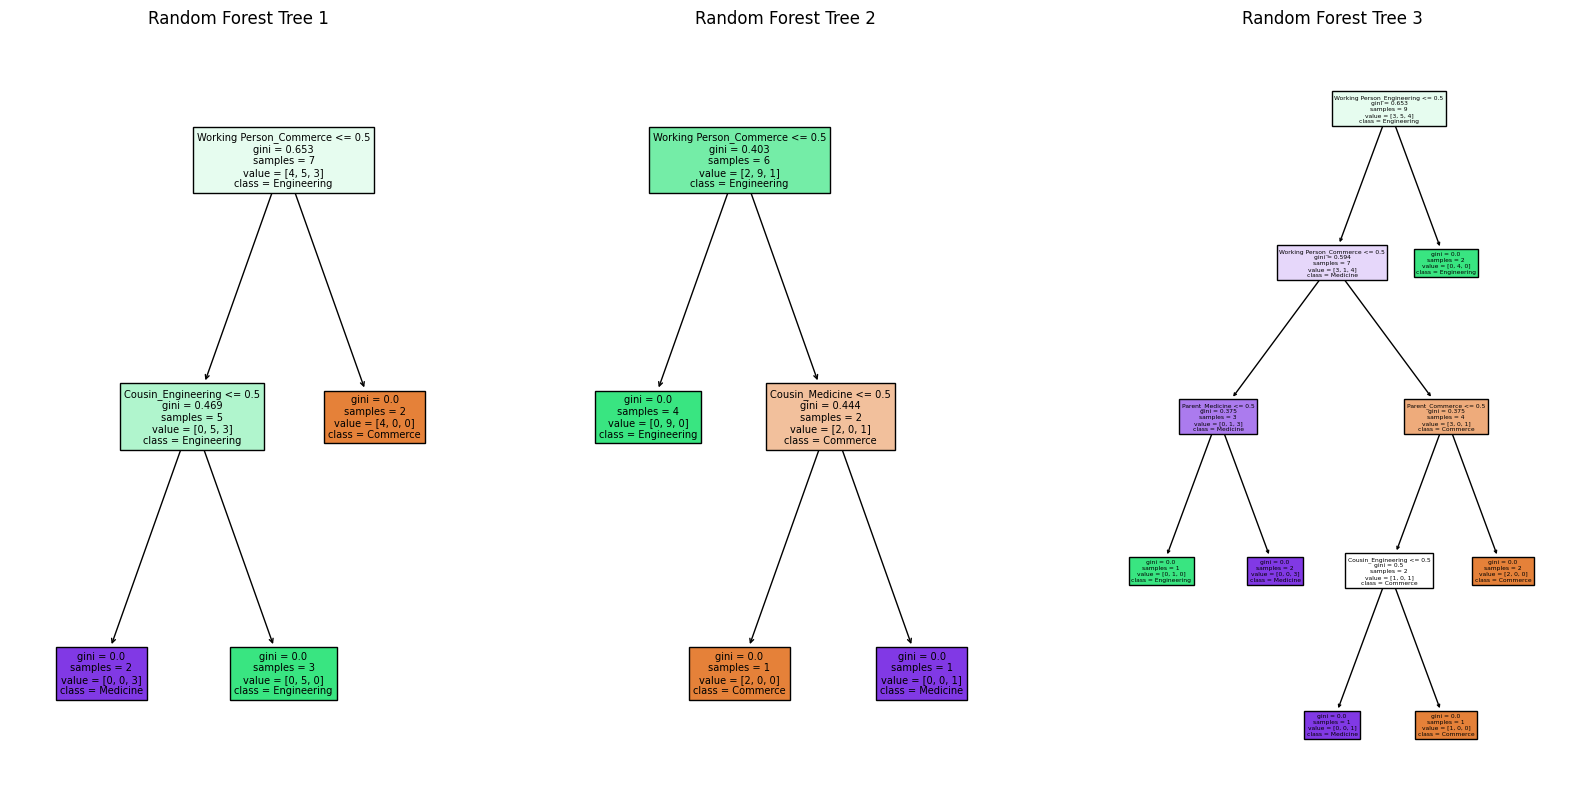

In [27]:
plt.figure(figsize=(20, 10))
for i in range(3):  
    plt.subplot(1, 3, i+1)
    plot_tree(rf_clf.estimators_[i], filled=True, feature_names=feature_names_list, class_names=class_names_list)
    plt.title(f'Random Forest Tree {i+1}')
plt.show()

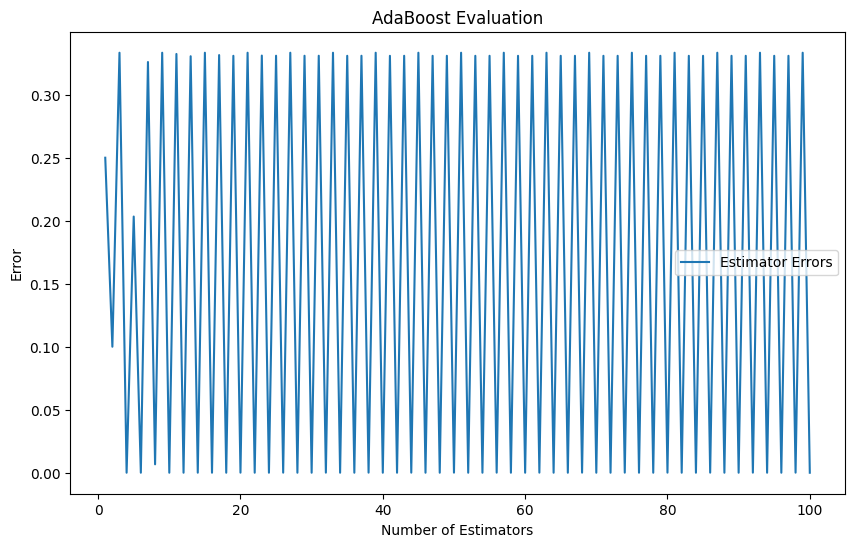

In [11]:
# AdaBoost evaluation
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ada_clf.estimator_errors_) + 1), ada_clf.estimator_errors_, label='Estimator Errors')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.title('AdaBoost Evaluation')
plt.legend()
plt.show()

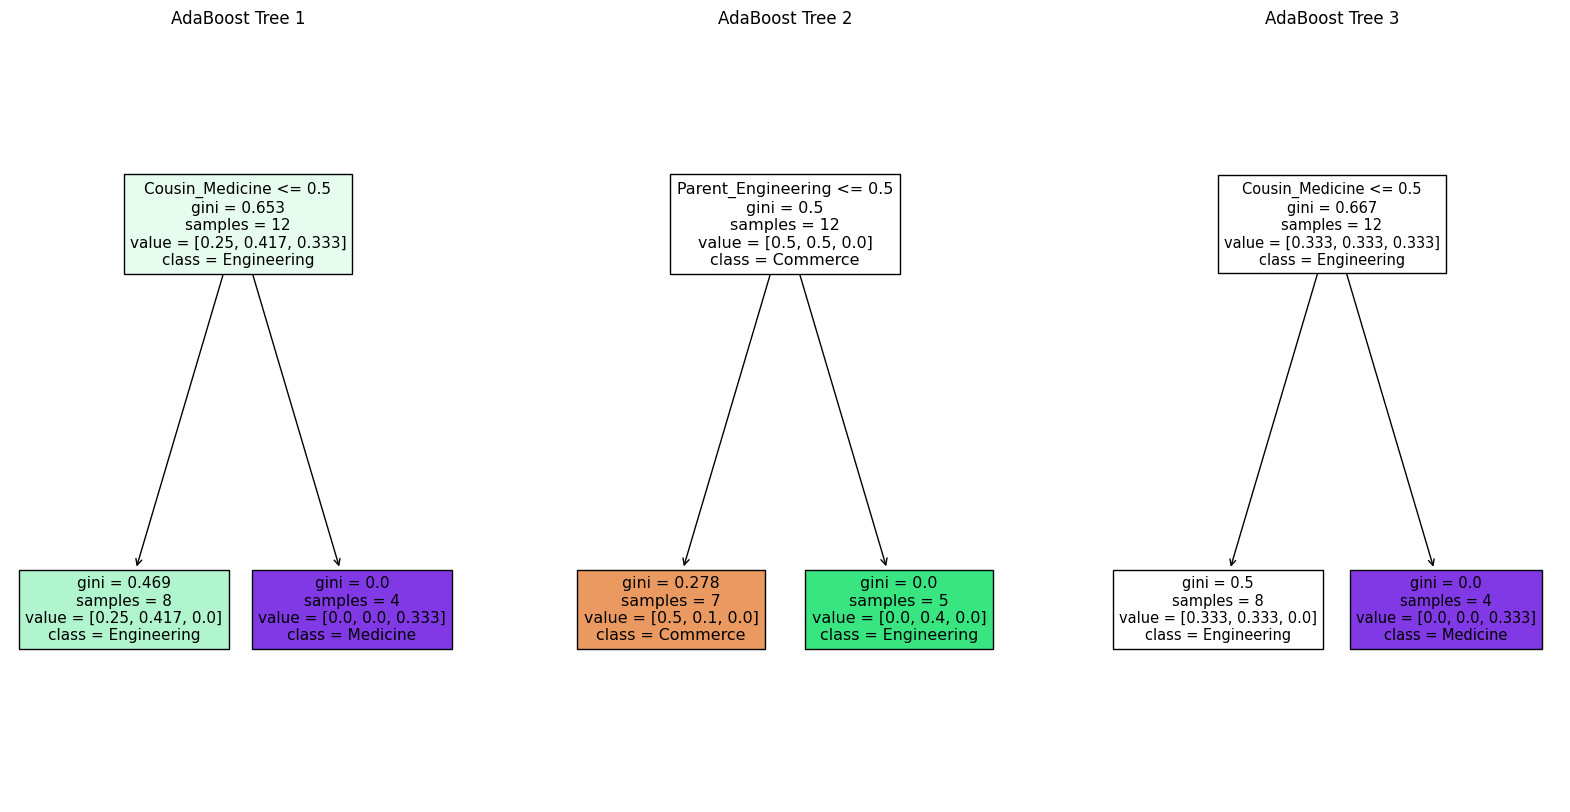

In [12]:
# AdaBoost trees
plt.figure(figsize=(20, 10))
for i, tree in enumerate(ada_clf.estimators_):
    if i == 3:  # Plot first 3 trees
        break
    plt.subplot(1, 3, i+1)
    plot_tree(tree, filled=True, feature_names=feature_names_list, class_names=class_names_list)
    plt.title(f'AdaBoost Tree {i+1}')
plt.show()

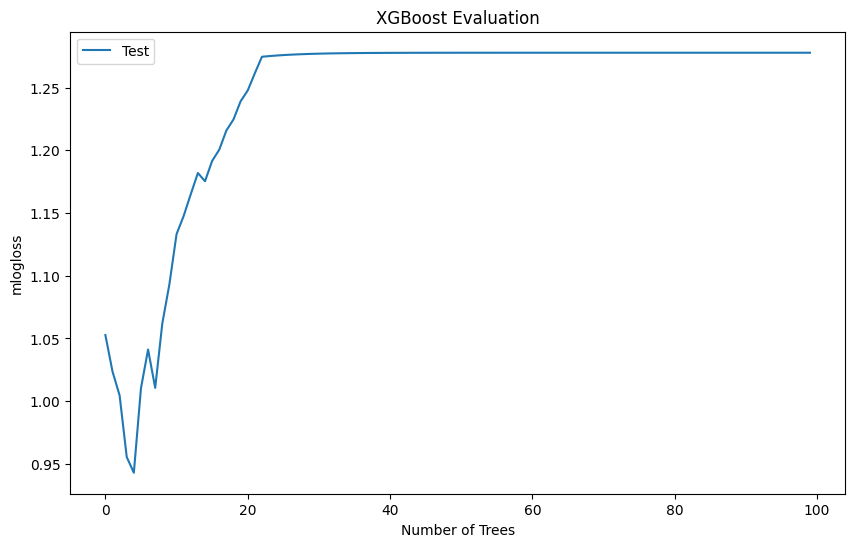

In [13]:
# XGBoost evaluation
results = xgb_clf.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['mlogloss'], label='Test')
plt.xlabel('Number of Trees')
plt.ylabel('mlogloss')
plt.title('XGBoost Evaluation')
plt.legend()
plt.show()


<Figure size 2000x1000 with 0 Axes>

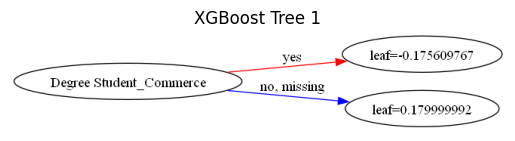

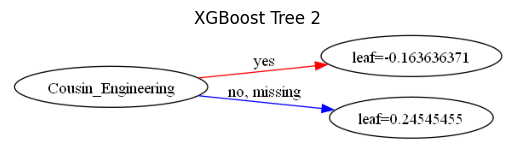

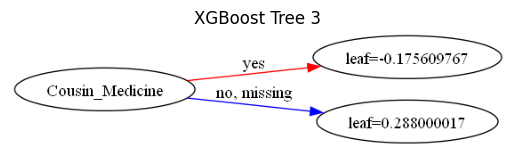

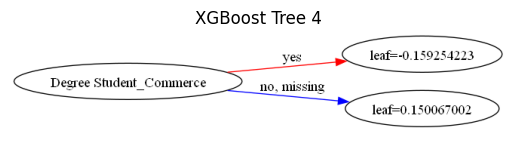

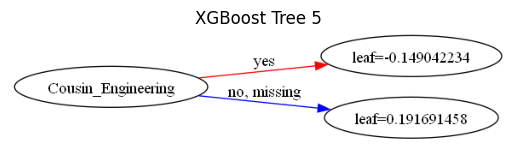

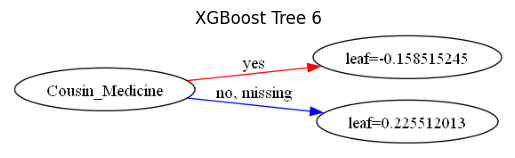

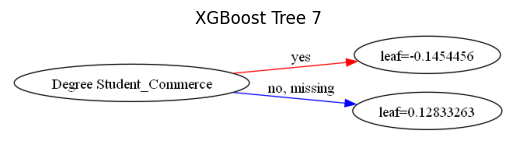

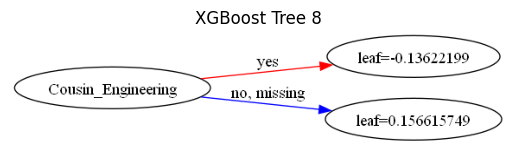

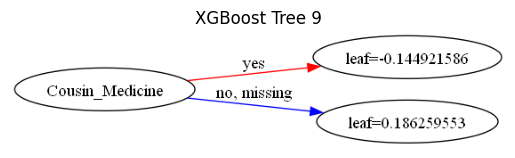

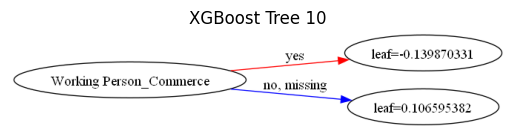

In [28]:
# XGBoost trees
plt.figure(figsize=(20, 10))
for i in range(10):
    xgb.plot_tree(xgb_clf.get_booster(), num_trees=i, rankdir='LR')
    plt.title(f'XGBoost Tree {i+1}')
plt.show()